                                      Classifications  Count
1                              Functional Suitability   1221
0                              Performance Efficiency    532
3                                         Reliability    311
5                                     Maintainability    218
2                                       Compatibility    210
6                              Interaction Capability    189
7                                         Flexibility     96
4                                            Security     86
10                                             Safety     28
11                                                        11
14                              InteractionCapability      4
9                           Functionality Suitability      4
8                                       Functionality      2
21  Weight and training would be improved if i can...      1
27                              Data Privacy Concerns      1
26                      

C:\Users\Maher\AppData\Local\Temp\ipykernel_9788\832148186.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


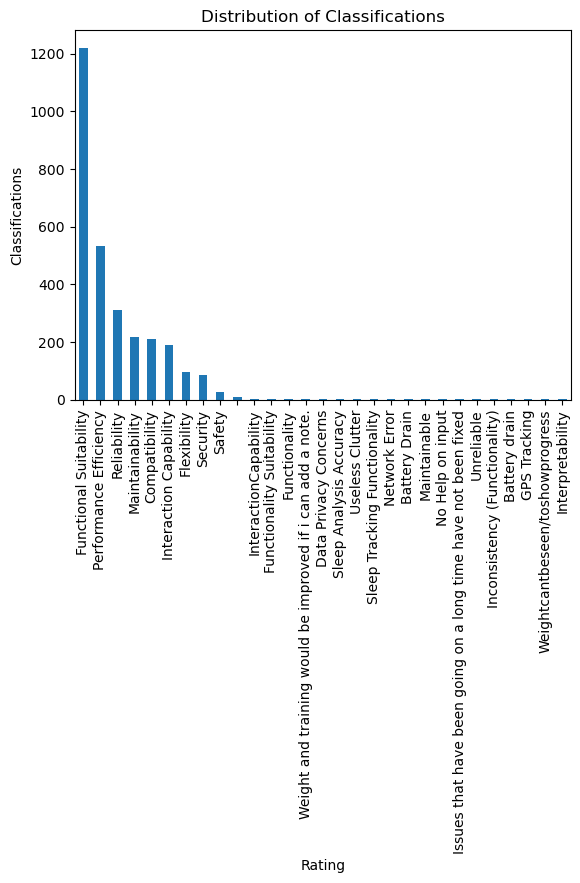

In [8]:
import pandas as pd
import ast
from collections import Counter

# Load the CSV file
df = pd.read_csv("output.csv")  # replace with your actual file name

# Helper function to safely parse string arrays
def parse_classification(rating_str):
    if pd.isnull(rating_str) or rating_str.strip() == '':
        return []
    try:
        parsed = ast.literal_eval(rating_str)
        if isinstance(parsed, list):
            return parsed
    except (ValueError, SyntaxError):
        pass
    return None

# Apply the parsing
df['parsed_classification'] = df['classification'].apply(parse_classification)

def graph():
    import matplotlib.pyplot as plt
    # Flatten all strings into a single list and count them
    all_characteristics = [item for sublist in df['parsed_classification'] if sublist is not None for item in sublist]
    characteristics_distribution = Counter(all_characteristics)
    
    # Convert to a DataFrame for readability
    distribution_df = pd.DataFrame(characteristics_distribution.items(), columns=['Classifications', 'Count'])
    distribution_df = distribution_df.sort_values(by='Count', ascending=False)
    
    print(distribution_df)
    distribution_df.plot(kind='bar', x='Classifications', y='Count', legend=False)
    plt.title('Distribution of Classifications')
    plt.ylabel('Classifications')
    plt.xlabel('Rating')
    plt.tight_layout()
    plt.show()

graph()


In [9]:
matched_df = df[
    ~df['parsed_classification']
      .astype(str)                       # ensure non-strings (NaN, numbers) become str
      .str.contains("Functional Suitability|Performance Efficiency|Reliability|Maintainability|Compatibility|Interaction Capability|Flexibility|Security|Safety", na=False)
]

matched_df = matched_df[~matched_df['parsed_classification'].apply(lambda x: isinstance(x, list) and len(x) == 0)]
matched_df

,appsname,review,rating,classification,classification_correct,parsed_classification
5,Samsung Health,For the most part I really like the app as it ...,3.0,These points address the user's issues regardi...,NaN,None
27,Samsung Health,This used to work well. Now for the past month...,3.0,These points directly relate to the applicatio...,NaN,None
32,Samsung Health,Not impressed. Does a poor job counting steps ...,2.0,These points are extracted from the review and...,NaN,None
42,Samsung Health,I really loved this for the step counter. I en...,3.0,These factors collectively point towards issue...,NaN,None
59,Samsung Health,I have a Samsung S3 watch connected to an LG v...,2.0,Answer: [],NaN,None
...,...,...,...,...,...,...
1771,Mi Fit,Disconnect automatic even having bluetooth con...,1.0,```,NaN,None
1856,Mi Fit,Not able to pair the band neither able to fact...,1.0,"Functional Suitability, Performance Efficiency...",NaN,None
1935,Mi Fit,Frustrating having to check for updates every ...,4.0,These points address issues specifically relat...,NaN,None
1942,Mi Fit,"Generally good, but: altitude and uphill/downh...",4.0,"Answer: [""Functional Suitability"", ""Maintainab...",NaN,None


In [10]:
mis_classifications = df[df["parsed_classification"].isnull()]
mis_classifications

,appsname,review,rating,classification,classification_correct,parsed_classification
5,Samsung Health,For the most part I really like the app as it ...,3.0,These points address the user's issues regardi...,NaN,None
27,Samsung Health,This used to work well. Now for the past month...,3.0,These points directly relate to the applicatio...,NaN,None
32,Samsung Health,Not impressed. Does a poor job counting steps ...,2.0,These points are extracted from the review and...,NaN,None
42,Samsung Health,I really loved this for the step counter. I en...,3.0,These factors collectively point towards issue...,NaN,None
59,Samsung Health,I have a Samsung S3 watch connected to an LG v...,2.0,Answer: [],NaN,None
...,...,...,...,...,...,...
1769,Mi Fit,The mi fit app is closing at night despite loc...,3.0,"**Answer:** [""Performance Efficiency""]",NaN,None
1771,Mi Fit,Disconnect automatic even having bluetooth con...,1.0,```,NaN,None
1856,Mi Fit,Not able to pair the band neither able to fact...,1.0,"Functional Suitability, Performance Efficiency...",NaN,None
1935,Mi Fit,Frustrating having to check for updates every ...,4.0,These points address issues specifically relat...,NaN,None


In [11]:
df

,appsname,review,rating,classification,classification_correct,parsed_classification
0,Samsung Health,I did like this app 'cause it keeps my daily r...,1.0,"[""Performance Efficiency"", ""Functional Suitabi...",1.0,"[Performance Efficiency, Functional Suitability]"
1,Samsung Health,"I love the app, but unfortunately it is draini...",3.0,"[""Performance Efficiency""]",1.0,[Performance Efficiency]
2,Samsung Health,"Overall, not super impressed. It doesn't sync ...",2.0,"[""Compatibility"", ""Functional Suitability""]",1.0,"[Compatibility, Functional Suitability]"
3,Samsung Health,"I used to love this app, but it has had so man...",1.0,"[""Functional Suitability"", ""Performance Effici...",1.0,"[Functional Suitability, Performance Efficienc..."
4,Samsung Health,Everything was going great until the app was r...,1.0,"[""Functional Suitability""]",1.0,[Functional Suitability]
...,...,...,...,...,...,...
1998,Mi Fit,I like the hardware but the app is so plain an...,3.0,"[""Interaction Capability""]",NaN,[Interaction Capability]
1999,Mi Fit,Watch faces don't work. I'm unable to use or e...,1.0,"[""Functional Suitability""]",NaN,[Functional Suitability]
2000,Mi Fit,"Excellent app. Functional, conencts to Google ...",5.0,"[""""]",NaN,[]
2001,Mi Fit,Ok!!!!!what is the catch to setting a password...,2.0,"[""Functional Suitability"", ""Interaction Capabi...",NaN,"[Functional Suitability, Interaction Capability]"


In [12]:
# Exclude rows in mis_classifications and matched_df from df
df = df[~df.index.isin(mis_classifications.index)]
df = df[~df.index.isin(matched_df.index)]
df

,appsname,review,rating,classification,classification_correct,parsed_classification
0,Samsung Health,I did like this app 'cause it keeps my daily r...,1.0,"[""Performance Efficiency"", ""Functional Suitabi...",1.0,"[Performance Efficiency, Functional Suitability]"
1,Samsung Health,"I love the app, but unfortunately it is draini...",3.0,"[""Performance Efficiency""]",1.0,[Performance Efficiency]
2,Samsung Health,"Overall, not super impressed. It doesn't sync ...",2.0,"[""Compatibility"", ""Functional Suitability""]",1.0,"[Compatibility, Functional Suitability]"
3,Samsung Health,"I used to love this app, but it has had so man...",1.0,"[""Functional Suitability"", ""Performance Effici...",1.0,"[Functional Suitability, Performance Efficienc..."
4,Samsung Health,Everything was going great until the app was r...,1.0,"[""Functional Suitability""]",1.0,[Functional Suitability]
...,...,...,...,...,...,...
1997,Mi Fit,The app is good but the mi band 4 will not wor...,1.0,"[""Interaction Capability""]",NaN,[Interaction Capability]
1998,Mi Fit,I like the hardware but the app is so plain an...,3.0,"[""Interaction Capability""]",NaN,[Interaction Capability]
1999,Mi Fit,Watch faces don't work. I'm unable to use or e...,1.0,"[""Functional Suitability""]",NaN,[Functional Suitability]
2001,Mi Fit,Ok!!!!!what is the catch to setting a password...,2.0,"[""Functional Suitability"", ""Interaction Capabi...",NaN,"[Functional Suitability, Interaction Capability]"


In [13]:
# Drop rows with classification NaN
df = df.dropna(subset=['classification'])
df

,appsname,review,rating,classification,classification_correct,parsed_classification
0,Samsung Health,I did like this app 'cause it keeps my daily r...,1.0,"[""Performance Efficiency"", ""Functional Suitabi...",1.0,"[Performance Efficiency, Functional Suitability]"
1,Samsung Health,"I love the app, but unfortunately it is draini...",3.0,"[""Performance Efficiency""]",1.0,[Performance Efficiency]
2,Samsung Health,"Overall, not super impressed. It doesn't sync ...",2.0,"[""Compatibility"", ""Functional Suitability""]",1.0,"[Compatibility, Functional Suitability]"
3,Samsung Health,"I used to love this app, but it has had so man...",1.0,"[""Functional Suitability"", ""Performance Effici...",1.0,"[Functional Suitability, Performance Efficienc..."
4,Samsung Health,Everything was going great until the app was r...,1.0,"[""Functional Suitability""]",1.0,[Functional Suitability]
...,...,...,...,...,...,...
1997,Mi Fit,The app is good but the mi band 4 will not wor...,1.0,"[""Interaction Capability""]",NaN,[Interaction Capability]
1998,Mi Fit,I like the hardware but the app is so plain an...,3.0,"[""Interaction Capability""]",NaN,[Interaction Capability]
1999,Mi Fit,Watch faces don't work. I'm unable to use or e...,1.0,"[""Functional Suitability""]",NaN,[Functional Suitability]
2001,Mi Fit,Ok!!!!!what is the catch to setting a password...,2.0,"[""Functional Suitability"", ""Interaction Capabi...",NaN,"[Functional Suitability, Interaction Capability]"


                                      Classifications  Count
1                              Functional Suitability   1221
0                              Performance Efficiency    532
3                                         Reliability    311
5                                     Maintainability    218
2                                       Compatibility    210
6                              Interaction Capability    189
7                                         Flexibility     96
4                                            Security     86
10                                             Safety     28
9                           Functionality Suitability      3
11                              InteractionCapability      3
8                                       Functionality      2
12                                      Battery drain      1
13  Issues that have been going on a long time hav...      1
14                                      Network Error      1
15                      

C:\Users\Maher\AppData\Local\Temp\ipykernel_9788\832148186.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


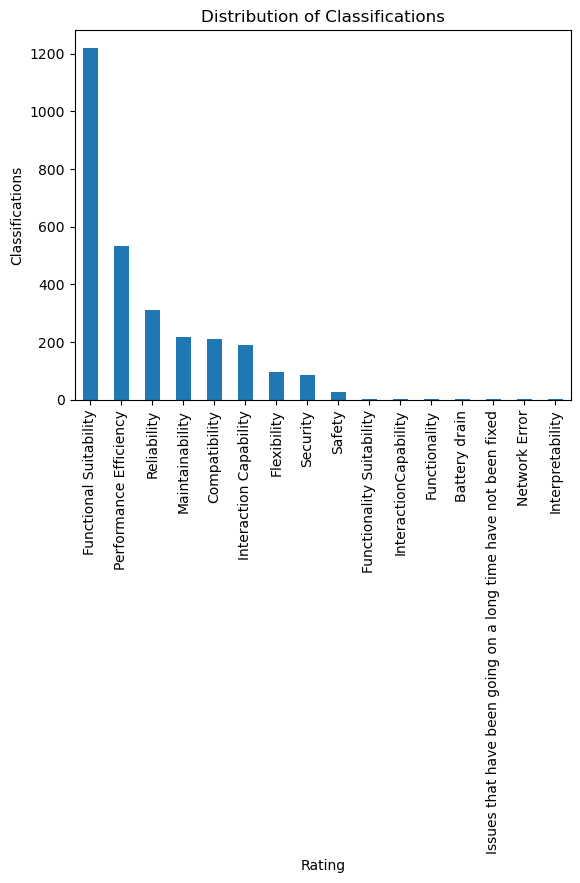

In [14]:
graph()

           Classifications  Count
1   Functional Suitability   1221
0   Performance Efficiency    532
3              Reliability    311
5          Maintainability    218
2            Compatibility    210
6   Interaction Capability    189
7              Flexibility     96
4                 Security     86
10                  Safety     28


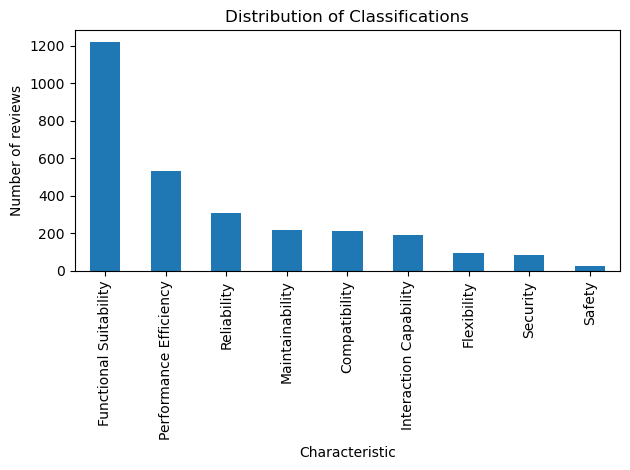

In [18]:
# only plot the first 9.
def graph_9():
    import matplotlib.pyplot as plt
    # Flatten all strings into a single list and count them
    all_characteristics = [item for sublist in df['parsed_classification'] if sublist is not None for item in sublist]
    characteristics_distribution = Counter(all_characteristics)
    
    # Convert to a DataFrame for readability
    distribution_df = pd.DataFrame(characteristics_distribution.items(), columns=['Classifications', 'Count'])
    distribution_df = distribution_df.sort_values(by='Count', ascending=False).head(9)
    
    print(distribution_df)
    distribution_df.plot(kind='bar', x='Classifications', y='Count', legend=False)
    plt.title('Distribution of Classifications')
    plt.ylabel('Number of reviews')
    plt.xlabel('Characteristic')
    plt.tight_layout()
    plt.show()
    
graph_9()